# Spatio-Temporal Traffic Forecasting with Neural Graph Cellular Automata
Petrônio C.  L. Silva  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>, Omid Orang  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-4077-3775" href="https://orcid.org/0000-0002-4077-3775" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>, Lucas Astore, Frederico G. Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>

In case you have any questions, do not hesitate in contact us using the following e-mail: petronio.candido@ifnmg.edu.br


## Imports

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import SpectralEmbedding

import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
!pip install tensordict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.2/253.2 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu124
    Uninstalling torch-2.5.1+cu124:
      Successfully uninstalled torch-2.5.1+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.18 requires torch<2.6,>=1.10, but you have torch 2.6.0 which is incompatible.
torchvision 0.20.1+cu124 requires torch==2.5.1, but you have torch 2.6.0 which is incompatible.
t

In [1]:

import torch
from torch import nn
from tensordict import TensorDict

activations = {
  'ReLU': nn.ReLU(),
  'GELU': nn.GELU(),
  'GLU': nn.GLU(),
  'SELU': nn.SELU()
}

normalizations = {
  'LayerNorm': nn.LayerNorm,
  'RMSNorm': nn.RMSNorm,
  'BatchNorm': nn.BatchNorm1d,
  'GroupNorm': nn.GroupNorm
}

dtypes = {
  'torch.int8': torch.int8,
  'torch.int16': torch.int16,
  'torch.int32': torch.int32,
  'torch.int64': torch.int64,
  'torch.int': torch.int,
  'torch.long': torch.long,
  'torch.float': torch.float,
  'torch.float16': torch.float16,
  'torch.float32': torch.float32,
  'torch.float64': torch.float64
}


def get_device():
  return 'cuda' if torch.cuda.is_available() else 'cpu'

def checkpoint(model, file):
  torch.save(model.state_dict(), file)

def checkpoint_all(file, **kwargs):
  torch.save({k: v for k,v in kwargs.items() }, file)

def resume(model, file):
  model.load_state_dict(torch.load(file, weights_only=True, map_location=torch.device(get_device())))

def resume_all(model, optimizer, file):
  checkpoint = torch.load( file, map_location=torch.device(get_device()))
  model.load_state_dict(checkpoint['model'])
  optimizer.load_state_dict(checkpoint['optim'])


class TensorDictDataframe:
  def __init__(self,**kwargs):
    self.dtype = kwargs.get('dtype',torch.float64)
    self.device = kwargs.get('device','cpu')

    df = kwargs.get('numeric_df',None)

    vals = {}
    self.numeric_columns = []
    for ix, column in enumerate(df.columns):
      vals[column] = torch.tensor(df[column].values, dtype=self.dtype)
      self.numeric_columns.append(column)
      self.length = len(df[column].values)

    self.numeric_data = TensorDict(vals).to(self.device)

    del(df)
    del(vals)

    df = kwargs.get('nonnumeric_df',None)

    vals = {}
    self.nonnumeric_columns = []
    for ix, column in enumerate(df.columns):
      vals[column] = df[column].values
      self.nonnumeric_columns.append(column)

    self.nonnumeric_data = TensorDict(vals).to(self.device)

    del(df)
    del(vals)

  def __getitem__(self, index):
    if isinstance(index, str):
      if index in self.numeric_columns:
        return self.numeric_data[index]
      elif  index in self.nonnumeric_columns:
        return self.nonnumeric_data[index]
      else:
        raise IndexError()
    elif isinstance(index, int):
      tmp = {}
      for col in self.nonnumeric_columns:
        tmp[col] = self.nonnumeric_data[col][index]
      for col in self.numeric_columns:
        tmp[col] = self.numeric_data[col][index]
      return TensorDict(tmp)
    elif isinstance(index, (list, tuple, set)):
      if len(index) > 2:
        raise IndexError()

      col, ix = index
      if col in self.numeric_columns:
        return self.numeric_data[col][ix]
      elif  col in self.nonnumeric_columns:
        return self.nonnumeric_data[col][ix]
      else:
        raise IndexError()

  def __len__(self):
    return self.length

  def __iter__(self):
    for ix in range(self.length):
      yield self[ix]

  def to(self, *args, **kwargs):
    if isinstance(args[0], str):
      self.device = args[0]
      self.numeric_data = self.numeric_data.to(*args, **kwargs)
      self.nonnumeric_data = self.nonnumeric_data.to(*args, **kwargs)
    return self

In [2]:
from datetime import datetime, timezone
import numpy as np
import pandas as pd
import torch
from torch import nn
from tensordict import TensorDict


def datetime_to_str(dt):
  return dt.strftime("%Y%m%d%H%M%S")

def str_to_datetime(dt):
  return datetime.strptime(dt, '%Y%m%d%H%M%S')

def to_pandas_datetime(values):
  return pd.to_datetime(values, format='%m/%d/%Y %H:%M')

def from_np_to_datetime(dt):
  dt = to_pandas_datetime(dt)
  return datetime(dt.year, dt.month, dt.day, dt.hour, dt.minute)

def from_pd_to_datetime(dt):
  return datetime(dt.year, dt.month, dt.day, dt.hour, dt.minute)

def from_datetime_to_pd(date : datetime):
  #return to_pandas_datetime(np.datetime64(date.astimezone(timezone.utc)))
  return to_pandas_datetime(np.datetime64(date.astimezone(None)))


class TemporalEmbedding(nn.Module):
    def __init__(self, dates, **kwargs):
        super().__init__()
        self.device = kwargs.get('device', 'cpu')
        self.dtype = kwargs.get('dtype', torch.float32)

        self.pi2 = torch.tensor([2 * torch.pi], dtype=self.dtype, device=self.device)
        self.week_minutes_rads = torch.tensor([7 * 1440], dtype=self.dtype, device=self.device)  # 7 days * 1440 minutes per week

        self.embeddings = {}
        for date in dates:
            self.embeddings[date] = self.forward(date)

    def week_embedding(self, date):
        """Compute smooth weekly seasonality."""
        minutes_since_week_start = torch.tensor([(date.weekday() * 1440) + (date.hour * 60) + date.minute], dtype=self.dtype, device=self.device)
        return torch.sin(self.pi2 * minutes_since_week_start / self.week_minutes_rads)

    def minute_embedding(self, date):
        """Compute smooth daily seasonality."""
        minutes_since_midnight = torch.tensor([(date.hour * 60) + date.minute], dtype=self.dtype, device=self.device)
        return torch.sin(self.pi2 * minutes_since_midnight / 1440)

    def forward(self, dt):
        """Compute the full embedding."""
        return torch.stack([self.week_embedding(dt), self.minute_embedding(dt)])

    def __getitem__(self, date):
        if isinstance(date, np.datetime64):
            date = pd.to_datetime(date).to_pydatetime()
        elif isinstance(date, pd.Timestamp):
            date = date.to_pydatetime()

        return self.embeddings.get(date, torch.tensor([0.0, 0.0], dtype=self.dtype, device=self.device))

    def all(self):
        ret = torch.stack([emb for emb in self.embeddings.values()])
        return ret

    def to(self, *args, **kwargs):
        self = super().to(*args, **kwargs)
        if isinstance(args[0], str):
            self.device = args[0]
        else:
            self.dtype = args[0]
        self.pi2 = self.pi2.to(*args, **kwargs)
        self.week_minutes_rads = self.week_minutes_rads.to(*args, **kwargs)
        return self


In [3]:
import numpy as np
import networkx as nx

from sklearn.manifold import SpectralEmbedding

import torch
from torch import nn

from tensordict import TensorDict


class SpatialEmbedding(nn.Module):
  def __init__(self, graph, laplacian_components = 2, **kwargs):
    super().__init__()
    self.device = kwargs.get('device','cpu')
    self.dtype = kwargs.get('dtype',torch.float32)
    tmp_dict = {}
    self.latlon = kwargs.get("latlon",True)
    if self.latlon:
      lat_dict = nx.get_node_attributes(graph,'lat')
      lon_dict = nx.get_node_attributes(graph,'lon')

      lat = [v for v in lat_dict.values()]
      lon = [v for v in lon_dict.values()]
      lat_min, lat_max = np.min(lat), np.max(lat)
      lat_rng = lat_max-lat_min
      lon_min, lon_max = np.min(lon), np.max(lon)
      lon_rng = lon_max-lon_min

    M = nx.adjacency_matrix(graph).todense()
    laplacian = SpectralEmbedding(n_components=laplacian_components) #, affinity='precomputed')
    laplacian_map = laplacian.fit_transform(M)

    self.length = 0
    for ix, node in enumerate(graph.nodes()):
        emb = np.zeros(4)
        if self.latlon:
          emb[0] = (lat_dict[node] - lat_min) / lat_rng * 2 - 1
          emb[1] = (lon_dict[node] - lon_min) / lon_rng * 2 - 1
          emb[2:] = laplacian_map[ix,:]
        else:
          emb = laplacian_map[ix,:]
        tmp_dict[str(node)] = torch.tensor(emb, dtype = self.dtype, device = self.device)
        self.length += 1

    self.embeddings = TensorDict(tmp_dict)

  def forward(self, node):
     return self.embeddings[str(node)]

  def __getitem__(self,  node):
     return self.embeddings[str(node)]

  def all(self):
    ret = torch.empty(self.length, 4,
                        dtype=self.dtype, device=self.device)
    for it,emb in enumerate(self.embeddings.values(sort=True)):
      ret[it, :] = emb
    return ret

  def to(self, *args, **kwargs):
    self = super().to(*args, **kwargs)
    if isinstance(args[0], str):
      self.device = args[0]
    else:
      self.dtype = args[0]
    self.embeddings = self.embeddings.to(*args, **kwargs)

    return self

In [4]:
import torch
from torch import nn


#@torch.compile
#def z(x, mu, sigma):
#  return (x - mu) / sigma


class ZTransform(nn.Module):
  def __init__(self, data, **kwargs):
    super().__init__()
    self.device = kwargs.get('device','cpu')
    self.dtype = kwargs.get('dtype',torch.float32)
    if not isinstance(data, torch.Tensor):
      data = torch.tensor(data, dtype=self.dtype, device=self.device)
    self.mu = torch.nanmean(data)
    self.sigma = torch.std(torch.nan_to_num(data,0,0,0))

  def forward(self, x):
     #return z(x, self.mu, self.sigma)
     return (x - self.mu) / self.sigma

  def to(self, *args, **kwargs):
    self = super().to(*args, **kwargs)
    if isinstance(args[0], str):
      self.device = args[0]
    else:
      self.dtype = args[0]
    self.mu = self.mu.to(*args, **kwargs)
    self.sigma = self.sigma.to(*args, **kwargs)

    return self

In [5]:
import torch
from torch import nn


class ScalingTransform(nn.Module):
  def __init__(self, data, **kwargs):
    super().__init__()
    self.device = kwargs.get('device','cpu')
    self.dtype = kwargs.get('dtype',torch.float32)
    if not isinstance(data, torch.Tensor):
      data = torch.tensor(data, dtype=self.dtype, device=self.device)
    self.min = torch.min(torch.nan_to_num(data,0,0,0))
    max = torch.max(torch.nan_to_num(data,0,0,0))
    self.range = max - self.min

  def forward(self, x):
     return (x - self.min) / self.range

  def to(self, *args, **kwargs):
    self = super().to(*args, **kwargs)
    if isinstance(args[0], str):
      self.device = args[0]
    else:
      self.dtype = args[0]
    self.min = self.min.to(*args, **kwargs)
    self.range = self.range.to(*args, **kwargs)

    return self

In [6]:
import torch
from torch import nn

# from normalization import ZTransform
# from scaling import ScalingTransform

class ValueEmbedding(nn.Module):
  def __init__(self, data, **kwargs):
    super().__init__()
    self.device = kwargs.get('device','cpu')
    self.dtype = kwargs.get('dtype',torch.float32)
    self.type = kwargs.get('value_embedding_type','normalization')

    if self.type == 'normalization':
      self.embedder = ZTransform(data, **kwargs)
    elif self.type == 'scaling':
      self.embedder = ScalingTransform(data, **kwargs)
    else:
      raise ValueError("Unknown embedder type!")

  def forward(self, x):
     return self.embedder.forward(x)

  def to(self, *args, **kwargs):
    self = super().to(*args, **kwargs)
    if isinstance(args[0], str):
      self.device = args[0]
    else:
      self.dtype = args[0]
    self.embedder = self.embedder.to(*args, **kwargs)

    return self

In [7]:
import torch
from torch.utils.data import Dataset

import torch
import numpy as np

import copy

def self_supervised_transform(x, token_dim, max_length,value_index,NULL_SYMBOL,dtype,device):
  r = np.random.rand()
  if r >= .9:
    # Remove the cell value and keep all the neighbors
    x[0,:] = torch.full([token_dim], NULL_SYMBOL, dtype = dtype, device=device)
  elif r >= .8:
    # remove the cell value e remove all neighbor values
    x[0,value_index] = torch.tensor([NULL_SYMBOL], dtype = dtype, device=device)
    x[1:,:] = torch.full((max_length-1, token_dim),NULL_SYMBOL, dtype = dtype, device=device)
  elif r >= .7:
    # Remove the cell value
    x[0,value_index] = torch.tensor([NULL_SYMBOL], dtype = dtype, device=device)
  elif r >= .6:
    # Remove neighbor values
    x[1:,:] = torch.full((max_length-1, token_dim),NULL_SYMBOL, dtype = dtype, device=device)
  elif r >= .5:
    # Introduce random noise
    x[:,value_index] = x[:,value_index] + torch.randn(max_length, dtype = dtype, device=device)/12
  return x


class SensorDataset(Dataset):
  def __init__(self, name, X, y, train = 0.7,
               dtype = torch.float64, **kwargs):
    super().__init__()

    self.NULL_SYMBOL = 0

    self.behavior = kwargs.get('behavior','deterministic')

    self.num_samples = len(X)

    self.num_features = kwargs.get('num_features',0)

    self.max_length = kwargs.get('max_length',0)

    self.token_dim = kwargs.get('token_dim',0)

    self.value_index= kwargs.get('value_index',0)

    self.name = name
    self.dtype = dtype
    self.device = kwargs.get('device','cpu')

    self.X = X.to(self.dtype).to(self.device)
    self.y = y.to(self.dtype).to(self.device)

    self.indexes = torch.randperm(self.num_samples)

    self.X = self.X[self.indexes]
    self.y = self.y[self.indexes]

    self.train_split = int(train * self.num_samples)
    self.is_validation = False

  def train(self) -> Dataset:
    tmp = copy.deepcopy(self)
    tmp.is_validation = False
    tmp.X = self.X[:self.train_split].to(self.device)
    tmp.y = self.y[:self.train_split].to(self.device)
    tmp.num_samples = tmp.X.size(0)
    return tmp

  def test(self) -> Dataset:
    tmp = copy.deepcopy(self)
    tmp.is_validation = True
    tmp.X = self.X[self.train_split:].to(self.device)
    tmp.y = self.y[self.train_split:].to(self.device)
    tmp.num_samples = tmp.X.size(0)
    return tmp

  # Make this function stochastic!
  # Sometimes X will return the full information,sometimes X will miss some part of the information,
  # and sometimes will return with corrupted information (add noise)
  def __getitem__(self, index):
    if self.behavior == 'deterministic':
      return self.X[index], self.y[index]
    else:
      x = torch.clone(self.X[index])
      x = self_supervised_transform(x, self.token_dim, self.max_length, self.value_index,
                                    self.NULL_SYMBOL,self.dtype,self.device)
      return x, self.y[index]

  def __len__(self):
    return self.num_samples

  def __iter__(self):
    for ix in range(self.num_samples):
      yield self[ix]

  def __str__(self):
    return "Dataset {}: {} attributes {} samples".format(self.name, self.num_attributes, self.num_samples)

  def to(self, *args, **kwargs):
    if isinstance(args[0], str):
      self.device = args[0]
    else:
      self.dtype = args[0]
    self.X = self.X.to(*args, **kwargs)
    self.y = self.y.to(*args, **kwargs)
    return self


class AllSensorDataset(Dataset):
  def __init__(self, pems, train = 0.8, **kwargs):
    super().__init__()

    self.pems = pems

    self.max_length = pems.max_length

    self.token_dim = pems.token_dim

    self.behavior = kwargs.get('behavior','deterministic')

    self.train_pct = train

    self.train_split = int(train * self.pems.num_samples)
    self.test_split = self.pems.num_samples - self.train_split

    self.samples = self.pems.num_samples * self.pems.num_sensors

    self.is_validation = False

  def train(self) -> Dataset:
    tmp = copy.deepcopy(self)
    tmp.is_validation = False
    return tmp

  def test(self) -> Dataset:
    tmp = copy.deepcopy(self)
    tmp.is_validation = True
    return tmp

  def __getitem__(self, index):
    if not self.is_validation:
      train_sensor_ix = index // (self.train_split - self.pems.steps_ahead)
      train_data_ix = index % (self.train_split - self.pems.steps_ahead)
      sensor = self.pems.get_sensor(train_sensor_ix)
      X,y = self.pems.get_sample(sensor, train_data_ix)
      #print(train_sensor_ix, sensor, train_data_ix)
    else:
      train_sensor_ix = index // (self.test_split - self.pems.steps_ahead)
      train_data_ix = (index % (self.test_split - self.pems.steps_ahead)) + self.train_split
      sensor = self.pems.get_sensor(train_sensor_ix)
      #print(train_sensor_ix, sensor, train_data_ix)
      X,y = self.pems.get_sample(sensor, train_data_ix)

    if self.behavior == 'deterministic':
      return X,y
    else:
      return self_supervised_transform(X, self.pems.token_dim, self.pems.max_length,
                                       self.pems.value_index, self.pems.NULL_SYMBOL,
                                       self.pems.dtype,self.pems.device), y

  def __len__(self):
    if not self.is_validation:
      return (self.train_split - self.pems.steps_ahead) * self.pems.num_sensors
    else:
      return (self.test_split - self.pems.steps_ahead) * self.pems.num_sensors

  def __iter__(self):
    for ix in range(len(self)):
      yield self[ix]

  def to(self, *args, **kwargs):
    self.pems = self.pems.to(*args, **kwargs)
    return self

In [8]:
import pandas as pd
import torch
from torch import nn

# from tensordict import TensorDict
# from st_nca.common import TensorDictDataframe

class NeighborhoodTokenizer(nn.Module):
  def __init__(self, **kwargs):
    super().__init__()

    self.NULL_SYMBOL = 0

    self.device = kwargs.get('device','cpu')
    self.dtype = kwargs.get('dtype',torch.float32)

    self.graph = kwargs.get('graph',None)

    self.num_nodes = kwargs.get('num_nodes',None)
    self.max_length = kwargs.get('max_length',None)
    self.token_dim = kwargs.get('token_dim',None)

    self.value_embedder = kwargs.get('value_embedder',None)
    self.spatial_embedding = kwargs.get('spatial_embedding',None)
    self.temporal_embedding = kwargs.get('temporal_embedding',None)

  def embedded_data(self, data, sensor):
    if isinstance(data, pd.DataFrame):
      values = data[str(sensor)].values
    elif isinstance(data, TensorDict):
      values = data[str(sensor)]
    elif isinstance(data, TensorDictDataframe):
      values = data[str(sensor)]

    return self.value_embedder(torch.tensor(values, dtype=self.dtype, device=self.device))

  def embedded_sample(self, data, sensor, index):
    if isinstance(data, pd.DataFrame):
      value = torch.tensor(data[str(sensor)].values[index], dtype=self.dtype, device=self.device)
    elif isinstance(data, TensorDict):
      value = data[str(sensor)]
    elif isinstance(data, TensorDictDataframe):
      value = data[str(sensor), index]

    return self.value_embedder(value)


  def tokenize(self, timestamp, values, node):
    val = self.value_embedder(values[str(node)])
    tim_emb = self.temporal_embedding(timestamp)

    tokens = self.spatial_embedding[node]
    tokens = torch.hstack([tokens, val ])
    tokens = torch.hstack([tokens, tim_emb])

    m = 1

    for neighbor in self.graph.neighbors(node):
      m += 1
      tokens = torch.hstack([tokens, self.spatial_embedding[neighbor]])
      tokens = torch.hstack([tokens, self.value_embedder(values[str(neighbor)])])
      tokens = torch.hstack([tokens, tim_emb])

    tokens = tokens.reshape(1, m, self.token_dim)

    tokens = torch.hstack([tokens, torch.full((1, self.max_length - m, self.token_dim), self.NULL_SYMBOL,
                                              dtype=self.dtype, device=self.device)])

    return tokens

  # Create an empty sequence of tokens (filled with -1)
  # Then extracts the data for a sensor and its neighbors and fill the values
  # in the tokens, together with the spatial and temporal embeddings
  def tokenize_all(self, data, sensor):

    tmp = self.embedded_data(data, sensor)
    n = len(tmp)
    tim_emb = self.temporal_embedding.all().reshape(n,2)

    tokens = self.spatial_embedding[sensor].repeat(n,1)
    tokens = torch.hstack([tokens, tmp.reshape(n,1) ])
    tokens = torch.hstack([tokens, tim_emb])

    m = 1

    for neighbor in self.graph.neighbors(sensor):
      m += 1
      tokens = torch.hstack([tokens, self.spatial_embedding[neighbor].repeat(n,1)])
      tokens = torch.hstack([tokens, self.embedded_data(data, neighbor).reshape(n,1) ])
      tokens = torch.hstack([tokens, tim_emb])

    tokens = tokens.reshape(n, m, self.token_dim)


    tokens = torch.hstack([tokens, torch.full((n,  self.max_length - m, self.token_dim), self.NULL_SYMBOL,
                                              dtype=self.dtype, device = self.device)])

    return tokens

  def tokenize_sample(self, data, node, index):

    if isinstance(data, pd.DataFrame):
      dt = data['timestamp'][index]
    elif isinstance(data, TensorDict):
      dt = index
    elif isinstance(data, TensorDictDataframe):
      dt = data['timestamp', index]

    tim_emb = self.temporal_embedding[dt]

    tokens = self.spatial_embedding[node]
    tokens = torch.hstack([tokens, self.embedded_sample(data, node, index)])
    tokens = torch.hstack([tokens, tim_emb])

    m = 1

    for neighbor in self.graph.neighbors(node):
      m += 1
      tokens = torch.hstack([tokens, self.spatial_embedding[neighbor]])
      tokens = torch.hstack([tokens, self.embedded_sample(data, neighbor, index)])
      tokens = torch.hstack([tokens, tim_emb])

    tokens = tokens.reshape(1, m, self.token_dim)

    tokens = torch.hstack([tokens, torch.full((1, self.max_length - m, self.token_dim), self.NULL_SYMBOL,
                                              dtype=self.dtype, device = self.device)])

    return tokens.reshape(self.max_length, self.token_dim)

  def forward(self, data, node, sample=None, **kwargs):
     if sample is None:
       return self.tokenize_all(data, node)
     else:
       return self.tokenize_sample(data, node, sample)

  def to(self, *args, **kwargs):
    self = super().to(*args, **kwargs)
    if isinstance(args[0], str):
      self.device = args[0]
    else:
      self.dtype = args[0]
    self.value_embedder = self.value_embedder.to(*args, **kwargs)
    self.spatial_embedding = self.spatial_embedding.to(*args, **kwargs)
    self.temporal_embedding = self.temporal_embedding.to(*args, **kwargs)
    return self

In [9]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.7 MB/s eta 0:00:00


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import torch

# from st_nca.embeddings.temporal import TemporalEmbedding, to_pandas_datetime
# from st_nca.embeddings.spatial import SpatialEmbedding
# from st_nca.embeddings.value import ValueEmbedding
# from st_nca.tokenizer import NeighborhoodTokenizer

# from st_nca.common import TensorDictDataframe

# from st_nca.datasets.datasets import SensorDataset, AllSensorDataset


def get_config(pems):
  return {
    'steps_ahead': pems.steps_ahead,
    'value_embedding_type': pems.tokenizer.value_embedder.type
  }


class PEMSBase:

    def __init__(self,**kwargs):

      self.dtype = kwargs.get('dtype',torch.float64)
      self.device = kwargs.get('device','cpu')

      self.steps_ahead = kwargs.get('steps_ahead',1)

      edges = pd.read_csv(kwargs.get('edges_file','edges.csv'), engine='pyarrow')

      # Create the graph
      self.G=nx.Graph()
      for row in edges.iterrows():
        self.G.add_edge(int(row[1]['source']),int(row[1]['target']), weight=row[1]['weight'])

      del(edges)

      self.data = pd.read_csv(kwargs.get('data_file','data.csv'), engine='pyarrow')
      self.data['timestamp'] = to_pandas_datetime(self.data['timestamp'].values)

      self.value_embedder = ValueEmbedding(torch.tensor(self.data[self.data.columns[1:]].values,
                                                dtype=self.dtype, device=self.device),
                                                **kwargs)

      self.latlon = kwargs.get("latlon",True)

      if self.latlon:

        laplacian_components = 2

        nodes = pd.read_csv(kwargs.get('nodes_file','nodes.csv'), engine='pyarrow')

        coordinates = {}

        for ix, node in enumerate(self.G.nodes()):

            _, lat, lon = nodes[nodes['sensor'] == node].values[0]

            coordinates[node] = {'lat': lat, 'lon': lon }

        nx.set_node_attributes(self.G, coordinates)

        del(nodes)

      else:

        laplacian_components = 4

      self.node_embeddings = SpatialEmbedding(self.G, latlon=self.latlon, laplacian_components = laplacian_components,
                                               dtype=self.dtype, device=self.device)




      self.max_length = max([d for n, d in self.G.degree()]) + 1


      self.time_embeddings = TemporalEmbedding(self.data['timestamp'], dtype=self.dtype, device=self.device)

      self.num_sensors = self.G.number_of_nodes()

      #self.sensors = sorted([k for k in self.G.nodes()])

      self.num_samples = len(self.data) - self.steps_ahead
      self.token_dim = 7

      self.value_index = 4

      self.tokenizer = NeighborhoodTokenizer(dtype = self.dtype, device = self.device,
                                             graph = self.G, num_nodes = self.num_sensors,
                                             max_length = self.max_length,
                                             token_dim = self.token_dim,
                                             value_embedder = self.value_embedder,
                                             spatial_embedding = self.node_embeddings,
                                             temporal_embedding = self.time_embeddings)

      self.NULL_SYMBOL = self.tokenizer.NULL_SYMBOL

      self.td = kwargs.get('use_tensordict', False)

      if self.td:
        self.to_tensordict()


    def to_tensordict(self):
      if not self.td:
        cols1 = self.data.columns[0]
        cols2 = self.data.columns[1:].tolist()

        df1 = self.data[[cols1]]
        df2 = self.data[cols2]

        self.data = TensorDictDataframe(dtype=self.dtype, device = self.device,
                                        numeric_df=df2, nonnumeric_df=df1)
        self.td = True


    def get_sample(self, sensor, index):
      X = self.tokenizer.tokenize_sample(self.data, sensor, index)
      if not self.td:
        y = torch.tensor(self.data[str(sensor)].values[index+self.steps_ahead], dtype=self.dtype, device=self.device)
      else:
        y = self.data[str(sensor),index+self.steps_ahead]
      return X,y

    def get_sensor_dataset(self, sensor, train = 0.7, dtype = torch.float64, **kwargs):
      X = self.tokenizer.tokenize_all(self.data, sensor)[:-self.steps_ahead]
      y = torch.tensor(self.data[str(sensor)].values[self.steps_ahead:], dtype=self.dtype, device=self.device)
      return SensorDataset(str(sensor),X,y,train, dtype, num_features = self.num_sensors,
                           max_length=self.max_length, token_dim=self.token_dim,
                           value_index=self.value_index, **kwargs)

    def get_fewsensors_dataset(self, sensors, train = 0.7, dtype = torch.float64, **kwargs):
      X = None
      y = None
      try:
        for sensor in sensors:
          tmpX = self.tokenizer.tokenize_all(self.data, sensor)[:-self.steps_ahead]
          tmpy = torch.tensor(self.data[str(sensor)].values[self.steps_ahead:], dtype=self.dtype, device=self.device)
          if X is None:
            X = tmpX
            y = tmpy
          else:
            #X = np.vstack((X,tmpX))
            X = torch.vstack((X,tmpX))
            #y = np.hstack((y,tmpy))
            y = torch.hstack((y,tmpy))
      except Exception as ex:
        print(sensor, str(ex))

      return SensorDataset('FEW',X,y,train, dtype, num_features = self.num_sensors,
                           max_length=self.max_length, token_dim=self.token_dim,
                           value_index=self.value_index, **kwargs)


    def get_breadth_dataset(self, start_sensor, max_sensors = 20, train = 0.7, dtype = torch.float64, **kwargs):
      sensors = []
      next = [start_sensor]
      m = 0
      while m < max_sensors:
        for sensor in next:
          if sensor not in sensors:
            sensors.append(sensor)
            m += 1
            next.remove(sensor)
            if m < max_sensors:
              for neighbor in self.G.neighbors(sensor):
                next.append(neighbor)
            else:
              break

      return self.get_fewsensors_dataset(sensors, train = train, dtype = dtype, **kwargs), sensors

    def get_allsensors_dataset(self, **kwargs):
      return AllSensorDataset(pems=self, **kwargs)

    def get_sensor(self, index):
      if not self.td:
        return int(self.data.columns[index + 1])
      else:
        return int(self.data.numeric_columns[index])


    def to(self, *args, **kwargs):
      if isinstance(args[0], str):
        self.device = args[0]
      else:
        self.dtype = args[0]
      return self

    def plot_embeddings(self, limit=5000):
        pos_latlon = nx.circular_layout(self.G)
        pos_graph = nx.circular_layout(self.G)
        lat_max, lat_min = -np.inf, np.inf
        lon_max, lon_min = -np.inf, np.inf

        graph1_max, graph1_min = -np.inf, np.inf
        graph2_max, graph2_min = -np.inf, np.inf

        for node in self.G.nodes():
            emb = self.node_embeddings[node]
            pos_graph[node] = emb[0:2]
            pos_latlon[node] = emb[2:4]

            lat_max, lat_min = max(lat_max, pos_latlon[node][0]), min(lat_min, pos_latlon[node][0])
            lon_max, lon_min = max(lon_max, pos_latlon[node][1]), min(lon_min, pos_latlon[node][1])

            graph1_max, graph1_min = max(graph1_max, pos_graph[node][0]), min(graph1_min, pos_graph[node][0])
            graph2_max, graph2_min = max(graph2_max, pos_graph[node][1]), min(graph2_min, pos_graph[node][1])

        fig, ax = plt.subplots(1, 3, figsize=(15, 5))

        # Spatial embeddings plot
        nx.draw(self.G, pos_latlon, node_size=25, ax=ax[0])
        ax[0].set_xlim([lat_min, lat_max])
        ax[0].set_ylim([lon_min, lon_max])
        xticks = [k for k in np.linspace(lat_min, lat_max, 5)]
        ax[0].set_xticks(xticks, [str(k) for k in xticks])
        yticks = [k for k in np.linspace(lon_min, lon_max, 5)]
        ax[0].set_yticks(yticks, [str(k) for k in yticks])
        ax[0].tick_params(labelleft=True)
        ax[0].set_title("Spatial Embeddings")

        # Graph embeddings plot
        nx.draw(self.G, pos_graph, node_size=25, ax=ax[1])
        ax[1].set_xlim([graph1_min, graph1_max])
        ax[1].set_ylim([graph2_min, graph2_max])
        ax[1].set_title("Graph Structure Embeddings")

        # Temporal embeddings plot
        temporal_embeddings = np.array([emb.cpu().numpy() for emb in self.time_embeddings.embeddings.values()])[:limit]


        if len(temporal_embeddings.shape) == 1:
            temporal_embeddings = temporal_embeddings.reshape(-1, 1)

        # Plot embeddings
        ax[2].plot(range(len(temporal_embeddings)), temporal_embeddings[:, 0], color='red', label='Weekly seasonality')

        if temporal_embeddings.shape[1] > 1:
            ax[2].plot(range(len(temporal_embeddings)), temporal_embeddings[:, 1], color='blue', label='Hourly seasonality')

        ax[2].set_title("Temporal Embeddings")
        ax[2].legend()

        plt.show()


class PEMS03(PEMSBase):
    def __init__(self,**kwargs):
      super(PEMS03, self).__init__(latlon = True,
                                   edges_file = kwargs.pop('edges_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS03/edges.csv"),
                                   nodes_file = kwargs.pop('nodes_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS03/nodes.csv"),
                                   data_file = kwargs.pop('data_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS03/data.csv"),
                                   **kwargs)

class PEMS04(PEMSBase):
    def __init__(self,**kwargs):
      super(PEMS04, self).__init__(latlon = False,
                                   edges_file = kwargs.pop('edges_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS04/edges.csv"),
                                   data_file = kwargs.pop('data_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS04/data.csv"),
                                   **kwargs)

class PEMS08(PEMSBase):
    def __init__(self,**kwargs):
      super(PEMS08, self).__init__(latlon = False,
                                   edges_file = kwargs.pop('edges_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS08/edges.csv"),
                                   data_file = kwargs.pop('data_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS08/data.csv"),
                                   **kwargs)

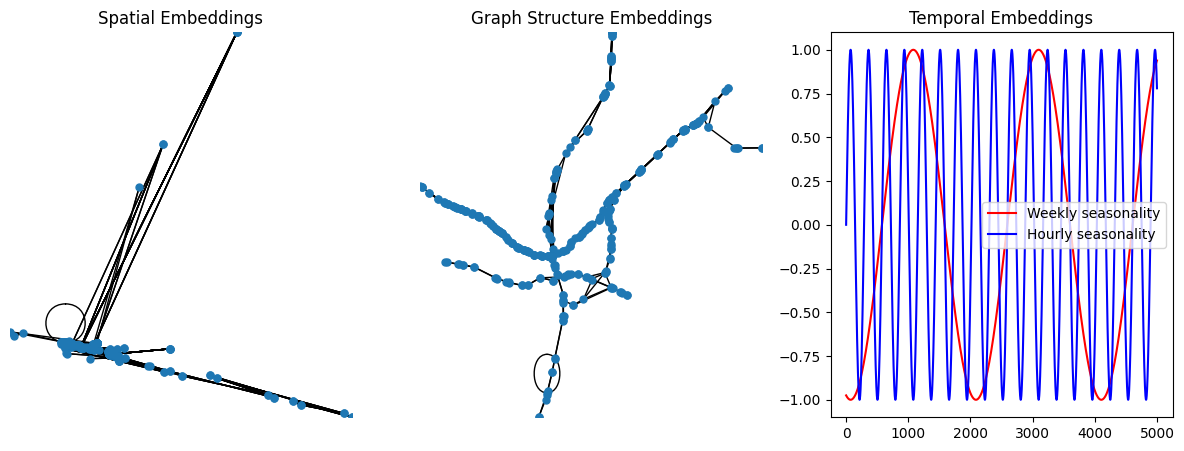

In [11]:
pems = PEMS03()

# Call the function to plot both embeddings
pems.plot_embeddings()

## Graph attention method

In [10]:
import torch
import torch.nn as nn
import torch_geometric
from torch_geometric.nn import GATConv
import networkx as nx
import numpy as np
from torch_geometric.data import Data

class GATSpatialEmbedding(nn.Module):
    def __init__(self, graph, embedding_dim=4, heads=2, **kwargs):
        super(GATSpatialEmbedding, self).__init__()
        self.device = kwargs.get('device', 'cpu')
        self.dtype = torch.float32

        self.node_map = {node: i for i, node in enumerate(graph.nodes())}
        self.inv_node_map = {i: node for node, i in self.node_map.items()}


        edges = [(self.node_map[u], self.node_map[v]) for u, v in graph.edges()]
        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous().to(self.device)


        num_nodes = len(self.node_map)
        x = torch.randn((num_nodes, embedding_dim), dtype=self.dtype, device=self.device)


        self.data = Data(x=x, edge_index=edge_index)


        self.gat = GATConv(in_channels=embedding_dim,
                           out_channels=embedding_dim // heads,
                           heads=heads,
                           concat=True,
                           dropout=0.2).to(self.device)


        self.embeddings = self.compute_embeddings()

    def compute_embeddings(self):
        """Compute GAT-based spatial embeddings."""
        return self.gat(self.data.x, self.data.edge_index)

    def forward(self, node):
        """Return embedding for a specific node (using mapped index)."""
        return self.embeddings[self.node_map[node]]

    def __getitem__(self, node):
        """Retrieve embedding using mapped node index."""
        return self.embeddings[self.node_map[node]]

    def all(self):
        """Retrieve all embeddings."""
        return self.embeddings

    def to(self, *args, **kwargs):
        """Move model to another device or dtype."""
        self = super().to(*args, **kwargs)
        if isinstance(args[0], str):
            self.device = args[0]
        else:
            self.dtype = args[0]
        self.embeddings = self.embeddings.to(*args, **kwargs)
        return self


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import torch

# from st_nca.embeddings.temporal import TemporalEmbedding, to_pandas_datetime
# from st_nca.embeddings.spatial import SpatialEmbedding
# from st_nca.embeddings.value import ValueEmbedding
# from st_nca.tokenizer import NeighborhoodTokenizer

# from st_nca.common import TensorDictDataframe

# from st_nca.datasets.datasets import SensorDataset, AllSensorDataset


def get_config(pems):
  return {
    'steps_ahead': pems.steps_ahead,
    'value_embedding_type': pems.tokenizer.value_embedder.type
  }


class PEMSBase:

    def __init__(self,**kwargs):

      self.dtype = kwargs.get('dtype',torch.float64)
      self.device = kwargs.get('device','cpu')

      self.steps_ahead = kwargs.get('steps_ahead',1)

      edges = pd.read_csv(kwargs.get('edges_file','edges.csv'), engine='pyarrow')

      # Create the graph
      self.G=nx.Graph()
      for row in edges.iterrows():
        self.G.add_edge(int(row[1]['source']),int(row[1]['target']), weight=row[1]['weight'])

      del(edges)

      self.data = pd.read_csv(kwargs.get('data_file','data.csv'), engine='pyarrow')
      self.data['timestamp'] = to_pandas_datetime(self.data['timestamp'].values)

      self.value_embedder = ValueEmbedding(torch.tensor(self.data[self.data.columns[1:]].values,
                                                dtype=self.dtype, device=self.device),
                                                **kwargs)

      self.latlon = kwargs.get("latlon",True)

      if self.latlon:

        #laplacian_components = 2

        nodes = pd.read_csv(kwargs.get('nodes_file','nodes.csv'), engine='pyarrow')

        coordinates = {}

        for ix, node in enumerate(self.G.nodes()):

            _, lat, lon = nodes[nodes['sensor'] == node].values[0]

            coordinates[node] = {'lat': lat, 'lon': lon }

        nx.set_node_attributes(self.G, coordinates)

        del(nodes)

      else:
        pass

        #laplacian_components = 4


      self.node_embeddings = GATSpatialEmbedding(self.G, embedding_dim=24, heads=8, device=self.device)



      self.max_length = max([d for n, d in self.G.degree()]) + 1


      self.time_embeddings = TemporalEmbedding(self.data['timestamp'], dtype=self.dtype, device=self.device)

      self.num_sensors = self.G.number_of_nodes()



      self.num_samples = len(self.data) - self.steps_ahead
      self.token_dim = 7

      self.value_index = 4

      self.tokenizer = NeighborhoodTokenizer(dtype = self.dtype, device = self.device,
                                             graph = self.G, num_nodes = self.num_sensors,
                                             max_length = self.max_length,
                                             token_dim = self.token_dim,
                                             value_embedder = self.value_embedder,
                                             spatial_embedding = self.node_embeddings,
                                             temporal_embedding = self.time_embeddings)

      self.NULL_SYMBOL = self.tokenizer.NULL_SYMBOL

      self.td = kwargs.get('use_tensordict', False)

      if self.td:
        self.to_tensordict()


    def to_tensordict(self):
      if not self.td:
        cols1 = self.data.columns[0]
        cols2 = self.data.columns[1:].tolist()

        df1 = self.data[[cols1]]
        df2 = self.data[cols2]

        self.data = TensorDictDataframe(dtype=self.dtype, device = self.device,
                                        numeric_df=df2, nonnumeric_df=df1)
        self.td = True


    def get_sample(self, sensor, index):
      X = self.tokenizer.tokenize_sample(self.data, sensor, index)
      if not self.td:
        y = torch.tensor(self.data[str(sensor)].values[index+self.steps_ahead], dtype=self.dtype, device=self.device)
      else:
        y = self.data[str(sensor),index+self.steps_ahead]
      return X,y


    def get_sensor_dataset(self, sensor, train = 0.7, dtype = torch.float64, **kwargs):
      X = self.tokenizer.tokenize_all(self.data, sensor)[:-self.steps_ahead]
      y = torch.tensor(self.data[str(sensor)].values[self.steps_ahead:], dtype=self.dtype, device=self.device)
      return SensorDataset(str(sensor),X,y,train, dtype, num_features = self.num_sensors,
                           max_length=self.max_length, token_dim=self.token_dim,
                           value_index=self.value_index, **kwargs)

    def get_fewsensors_dataset(self, sensors, train = 0.7, dtype = torch.float64, **kwargs):
      X = None
      y = None
      try:
        for sensor in sensors:
          tmpX = self.tokenizer.tokenize_all(self.data, sensor)[:-self.steps_ahead]
          tmpy = torch.tensor(self.data[str(sensor)].values[self.steps_ahead:], dtype=self.dtype, device=self.device)
          if X is None:
            X = tmpX
            y = tmpy
          else:
            #X = np.vstack((X,tmpX))
            X = torch.vstack((X,tmpX))
            #y = np.hstack((y,tmpy))
            y = torch.hstack((y,tmpy))
      except Exception as ex:
        print(sensor, str(ex))

      return SensorDataset('FEW',X,y,train, dtype, num_features = self.num_sensors,
                           max_length=self.max_length, token_dim=self.token_dim,
                           value_index=self.value_index, **kwargs)


    def get_breadth_dataset(self, start_sensor, max_sensors = 20, train = 0.7, dtype = torch.float64, **kwargs):
      sensors = []
      next = [start_sensor]
      m = 0
      while m < max_sensors:
        for sensor in next:
          if sensor not in sensors:
            sensors.append(sensor)
            m += 1
            next.remove(sensor)
            if m < max_sensors:
              for neighbor in self.G.neighbors(sensor):
                next.append(neighbor)
            else:
              break

      return self.get_fewsensors_dataset(sensors, train = train, dtype = dtype, **kwargs), sensors

    def get_allsensors_dataset(self, **kwargs):
      return AllSensorDataset(pems=self, **kwargs)

    def get_sensor(self, index):
      if not self.td:
        return int(self.data.columns[index + 1])
      else:
        return int(self.data.numeric_columns[index])


    def to(self, *args, **kwargs):
      if isinstance(args[0], str):
        self.device = args[0]
      else:
        self.dtype = args[0]
      return self

    def plot_embeddings(self, limit=5000):
      pos_latlon = nx.circular_layout(self.G)
      pos_graph = nx.circular_layout(self.G)
      lat_max, lat_min = -np.inf, np.inf
      lon_max, lon_min = -np.inf, np.inf

      graph1_max, graph1_min = -np.inf, np.inf
      graph2_max, graph2_min = -np.inf, np.inf

      for node in self.G.nodes():
          emb = self.node_embeddings[node]

          pos_latlon[node] = emb[2:4].cpu().detach().numpy()
          pos_graph[node] = emb[0:2].cpu().detach().numpy()

          lat_max, lat_min = max(lat_max, pos_latlon[node][0]), min(lat_min, pos_latlon[node][0])
          lon_max, lon_min = max(lon_max, pos_latlon[node][1]), min(lon_min, pos_latlon[node][1])

          graph1_max, graph1_min = max(graph1_max, pos_graph[node][0]), min(graph1_min, pos_graph[node][0])
          graph2_max, graph2_min = max(graph2_max, pos_graph[node][1]), min(graph2_min, pos_graph[node][1])

      fig, ax = plt.subplots(1, 3, figsize=(15, 5))

      # Spatial embeddings plot
      nx.draw(self.G, pos_latlon, node_size=25, ax=ax[0])
      ax[0].set_xlim([lat_min, lat_max])
      ax[0].set_ylim([lon_min, lon_max])
      xticks = [k for k in np.linspace(lat_min, lat_max, 5)]
      ax[0].set_xticks(xticks, [str(k) for k in xticks])
      yticks = [k for k in np.linspace(lon_min, lon_max, 5)]
      ax[0].set_yticks(yticks, [str(k) for k in yticks])
      ax[0].tick_params(labelleft=True)
      ax[0].set_title("Spatial Embeddings")

      # Graph embeddings plot
      nx.draw(self.G, pos_graph, node_size=25, ax=ax[1])
      ax[1].set_xlim([graph1_min, graph1_max])
      ax[1].set_ylim([graph2_min, graph2_max])
      ax[1].set_title("Graph Attention Embeddings")

      # Temporal embeddings plot
      temporal_embeddings = np.array([emb.cpu().detach().numpy() for emb in self.time_embeddings.embeddings.values()])[:limit]

      if len(temporal_embeddings.shape) == 1:
          temporal_embeddings = temporal_embeddings.reshape(-1, 1)

      ax[2].plot(range(len(temporal_embeddings)), temporal_embeddings[:, 0], color='red', label='Weekly seasonality')

      if temporal_embeddings.shape[1] > 1:
          ax[2].plot(range(len(temporal_embeddings)), temporal_embeddings[:, 1], color='blue', label='Hourly seasonality')

      ax[2].set_title("Temporal Embeddings")
      ax[2].legend()

      plt.show()



class PEMS03(PEMSBase):
    def __init__(self,**kwargs):
      super(PEMS03, self).__init__(latlon = True,
                                   edges_file = kwargs.pop('edges_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS03/edges.csv"),
                                   nodes_file = kwargs.pop('nodes_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS03/nodes.csv"),
                                   data_file = kwargs.pop('data_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS03/data.csv"),
                                   **kwargs)

class PEMS04(PEMSBase):
    def __init__(self,**kwargs):
      super(PEMS04, self).__init__(latlon = False,
                                   edges_file = kwargs.pop('edges_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS04/edges.csv"),
                                   data_file = kwargs.pop('data_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS04/data.csv"),
                                   **kwargs)

class PEMS08(PEMSBase):
    def __init__(self,**kwargs):
      super(PEMS08, self).__init__(latlon = False,
                                   edges_file = kwargs.pop('edges_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS08/edges.csv"),
                                   data_file = kwargs.pop('data_file', "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS08/data.csv"),
                                   **kwargs)

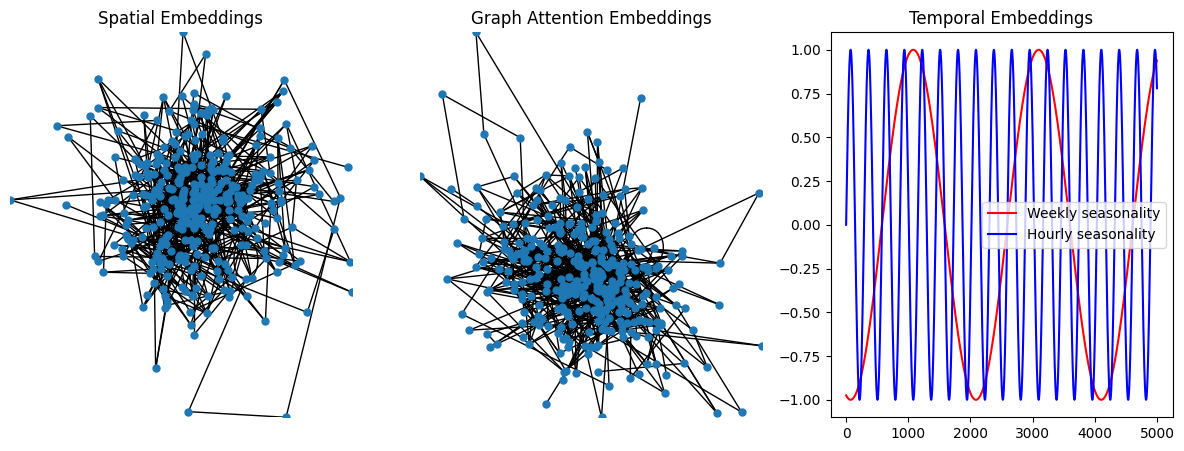

In [14]:
pems = PEMS03()


pems.plot_embeddings()

In [27]:
# Ensure an instance is created
pems03_instance = PEMS03()

# Print available timestamps
print("Available timestamps:", pems03_instance.data['timestamp'].head(10))

# Select a specific timestamp from the dataset
timestamp = pems03_instance.data['timestamp'].iloc[20]  # Get the first timestamp

# Retrieve the corresponding time embedding
embedding = pems03_instance.time_embeddings[timestamp]
print("Time Embedding for first timestamp:", embedding)

Available timestamps: 0   2018-09-01 00:00:00
1   2018-09-01 00:05:00
2   2018-09-01 00:10:00
3   2018-09-01 00:15:00
4   2018-09-01 00:20:00
5   2018-09-01 00:25:00
6   2018-09-01 00:30:00
7   2018-09-01 00:35:00
8   2018-09-01 00:40:00
9   2018-09-01 00:45:00
Name: timestamp, dtype: datetime64[ns]
Time Embedding for first timestamp: tensor([[-0.9869],
        [ 0.4226]], dtype=torch.float64)


In [28]:
pems03_instance = PEMS03()

nodes = list(pems03_instance.G.nodes())


print("First 10 Spatial Embeddings:")
for node in nodes[:10]:
    embedding = pems03_instance.node_embeddings[node]
    print(f"Node {node}: {embedding}")


First 10 Spatial Embeddings:
Node 317842: tensor([ 0.0000,  0.0000,  0.0000, -0.5345, -1.8733,  0.9315, -0.4752,  1.0090,
        -0.5542,  1.0654, -1.7650, -0.4352, -0.9084,  2.2827, -0.3790, -0.7358,
        -0.0418, -1.1970,  0.0597, -1.2124, -1.0736, -0.1703,  1.2530,  1.1572],
       grad_fn=<SelectBackward0>)
Node 318711: tensor([ 2.6497, -1.1771, -0.6565,  0.3273, -0.4029,  0.7037, -0.9789, -0.1767,
        -0.7198,  0.1741, -0.5530, -0.1536, -0.3578,  1.1311,  0.2368, -0.5708,
         1.0594, -0.8473, -1.0036, -0.2734, -0.9541,  0.3612,  0.7861,  1.0783],
       grad_fn=<SelectBackward0>)
Node 318721: tensor([ 2.4701, -1.4455, -0.5560,  0.5332,  0.6715, -0.3696, -0.3544,  0.0087,
         0.3292,  0.1081, -0.6495, -0.7922, -0.0923, -0.3776,  0.0559, -0.7007,
         2.2778,  0.1329, -1.0184,  0.3467, -0.3940,  0.5170, -1.1351,  0.3822],
       grad_fn=<SelectBackward0>)
Node 315955: tensor([ 0.3523, -1.3875,  0.1419, -0.0670,  0.0346, -0.8708, -0.3873,  0.0095,
         0.359

## Transformer

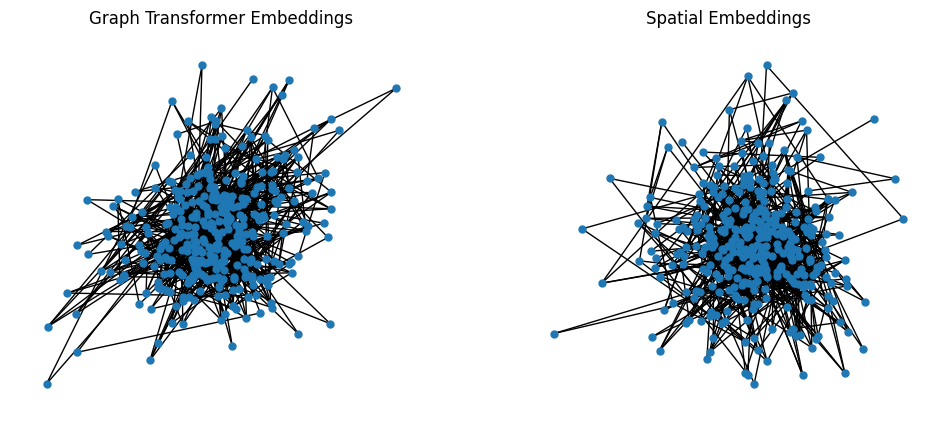

In [18]:
import torch
import torch.nn as nn
import torch_geometric
from torch_geometric.nn import TransformerConv
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch_geometric.data import Data

class GraphTransformerSpatialEmbedding(nn.Module):
    def __init__(self, graph, embedding_dim=8, heads=4, num_layers=2, **kwargs):
        super(GraphTransformerSpatialEmbedding, self).__init__()
        self.device = kwargs.get('device', 'cpu')
        self.dtype = torch.float32


        self.node_map = {node: i for i, node in enumerate(graph.nodes())}
        self.inv_node_map = {i: node for node, i in self.node_map.items()}


        edges = [(self.node_map[u], self.node_map[v]) for u, v in graph.edges()]
        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous().to(self.device)

        num_nodes = len(self.node_map)
        x = torch.randn((num_nodes, embedding_dim), dtype=self.dtype, device=self.device)


        self.data = Data(x=x, edge_index=edge_index)


        self.graph_transformer = nn.ModuleList([
            TransformerConv(in_channels=embedding_dim,
                            out_channels=embedding_dim // heads,
                            heads=heads,
                            dropout=0.2).to(self.device)
            for _ in range(num_layers)
        ])


        self.embeddings = self.compute_embeddings()

    def compute_embeddings(self):
        """Compute Transformer-based spatial embeddings."""
        x = self.data.x
        edge_index = self.data.edge_index
        for layer in self.graph_transformer:
            x = layer(x, edge_index)
        return x

    def forward(self, node):
        """Return embedding for a specific node (using mapped index)."""
        return self.embeddings[self.node_map[node]]

    def __getitem__(self, node):
        """Retrieve embedding using mapped node index."""
        return self.embeddings[self.node_map[node]]

    def all(self):
        """Retrieve all embeddings."""
        return self.embeddings

    def to(self, *args, **kwargs):
        """Move model to another device or dtype."""
        self = super().to(*args, **kwargs)
        if isinstance(args[0], str):
            self.device = args[0]
        else:
            self.dtype = args[0]
        self.embeddings = self.embeddings.to(*args, **kwargs)
        return self


class PEMSBase:

    def __init__(self, **kwargs):
        self.dtype = kwargs.get('dtype', torch.float64)
        self.device = kwargs.get('device', 'cpu')

        self.steps_ahead = kwargs.get('steps_ahead', 1)

        edges = pd.read_csv(kwargs.get('edges_file', 'edges.csv'), engine='pyarrow')

        # Create the graph
        self.G = nx.Graph()
        for row in edges.iterrows():
            self.G.add_edge(int(row[1]['source']), int(row[1]['target']), weight=row[1]['weight'])

        del edges

        self.data = pd.read_csv(kwargs.get('data_file', 'data.csv'), engine='pyarrow')

        self.latlon = kwargs.get("latlon", True)

        if self.latlon:
            # laplacian_components = 2
            nodes = pd.read_csv(kwargs.get('nodes_file', 'nodes.csv'), engine='pyarrow')

            coordinates = {}
            for ix, node in enumerate(self.G.nodes()):
                _, lat, lon = nodes[nodes['sensor'] == node].values[0]
                coordinates[node] = {'lat': lat, 'lon': lon}

            nx.set_node_attributes(self.G, coordinates)
            del nodes

        else:
          pass

            # laplacian_components = 4


        self.node_embeddings = GraphTransformerSpatialEmbedding(self.G, embedding_dim=24, heads=8, device=self.device)

        self.max_length = max([d for n, d in self.G.degree()]) + 1

        self.num_sensors = self.G.number_of_nodes()
        self.num_samples = len(self.data) - self.steps_ahead
        self.token_dim = 7
        self.value_index = 4

    def plot_embeddings(self, limit=5000):
        """Plot Graph Transformer-based embeddings."""
        pos_latlon = nx.circular_layout(self.G)
        pos_graph = nx.circular_layout(self.G)

        for node in self.G.nodes():
            emb = self.node_embeddings[node].cpu().detach().numpy()
            pos_graph[node] = emb[0:2]  # Transformer embedding
            pos_latlon[node] = emb[2:4] if len(emb) > 3 else emb[0:2]  # If no lat/lon, use Transformer embedding

        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        # Graph Structure Embeddings
        nx.draw(self.G, pos_graph, node_size=25, ax=ax[0])
        ax[0].set_title("Graph Transformer Embeddings")

        # Spatial Layout (if lat/lon available)
        nx.draw(self.G, pos_latlon, node_size=25, ax=ax[1])
        ax[1].set_title("Spatial Embeddings")

        plt.show()


class PEMS03(PEMSBase):
    def __init__(self, **kwargs):
        super(PEMS03, self).__init__(latlon=True,
                                     edges_file=kwargs.pop('edges_file',
                                                           "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS03/edges.csv"),
                                     nodes_file=kwargs.pop('nodes_file',
                                                           "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS03/nodes.csv"),
                                     data_file=kwargs.pop('data_file',
                                                          "https://raw.githubusercontent.com/petroniocandido/st_nca/refs/heads/main/st_nca/data/PEMS03/data.csv"),
                                     **kwargs)



pems = PEMS03()
pems.plot_embeddings()



In [17]:

pems03_instance = PEMS03()

nodes = list(pems03_instance.G.nodes())

print("First 10 Spatial Embeddings:")
for node in nodes[:10]:
    embedding = pems03_instance.node_embeddings[node]
    print(f"Node {node}: {embedding}")


First 10 Spatial Embeddings:
Node 317842: tensor([-0.7363, -0.3807, -0.0170,  0.1177, -0.0264, -0.8841, -1.2852, -0.6707,
        -0.1472,  0.3403,  0.6942,  0.2700,  0.8314,  0.3217,  0.1967,  0.2523,
         0.0796, -0.0412,  0.0741,  0.0165,  0.1337, -0.5333, -0.2537,  0.1760],
       grad_fn=<SelectBackward0>)
Node 318711: tensor([-1.1435, -1.5847, -0.8944, -0.5501,  0.2668, -0.7958,  0.7494,  0.3373,
        -0.1281,  0.4813, -0.3073, -1.0565,  0.1142,  0.2363,  0.0269,  0.7955,
        -0.0331,  0.4066, -0.8109,  0.1987, -0.1488, -0.0320,  0.1059,  0.0609],
       grad_fn=<SelectBackward0>)
Node 318721: tensor([-0.3718,  0.3732,  0.3222,  0.9796, -0.1307, -0.5325, -0.8977, -0.7494,
        -0.3621,  0.3841,  0.1019, -0.4678, -0.3361,  0.1225, -0.7825, -0.6867,
         0.7240, -0.6766, -0.5913, -1.0580, -0.3637, -0.5865, -1.0534,  0.6177],
       grad_fn=<SelectBackward0>)
Node 315955: tensor([-0.2562,  0.4723,  1.2144,  0.3011, -0.2878, -0.1236, -0.1916, -0.0919,
        -0.308